In [42]:
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
# Load data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseValue"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df = df.drop(df.loc[df["MedHouseValue"] == max(df["MedHouseValue"])].index)
df.shape

(19675, 9)

In [10]:
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

In [34]:
# Scale features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15740, 8) (3935, 8) (15740,) (3935,)


In [32]:
linear_model = LinearRegression().fit(X_train, y_train)

## Model Evaluation

In [35]:
print(f"Training score: {linear_model.score(X_train, y_train)}")

Training score: 0.5687308648274065


In [16]:
predictors = X_train.columns

In [18]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

Longitude    -0.394290
Latitude     -0.378804
AveRooms     -0.103072
AveOccup     -0.003136
Population    0.000005
HouseAge      0.008211
MedInc        0.426045
AveBedrms     0.575254
dtype: float64

In [19]:
y_pred = linear_model.predict(X_test)

In [20]:
df_pred_actual = pd.DataFrame({"predicted": y_pred, "actual": y_test})

In [21]:
df_pred_actual.head()

,predicted,actual
15065,1.303371,1.042
14534,2.199356,1.712
13570,1.793263,0.973
2607,1.554818,1.027
12750,1.041182,1.165


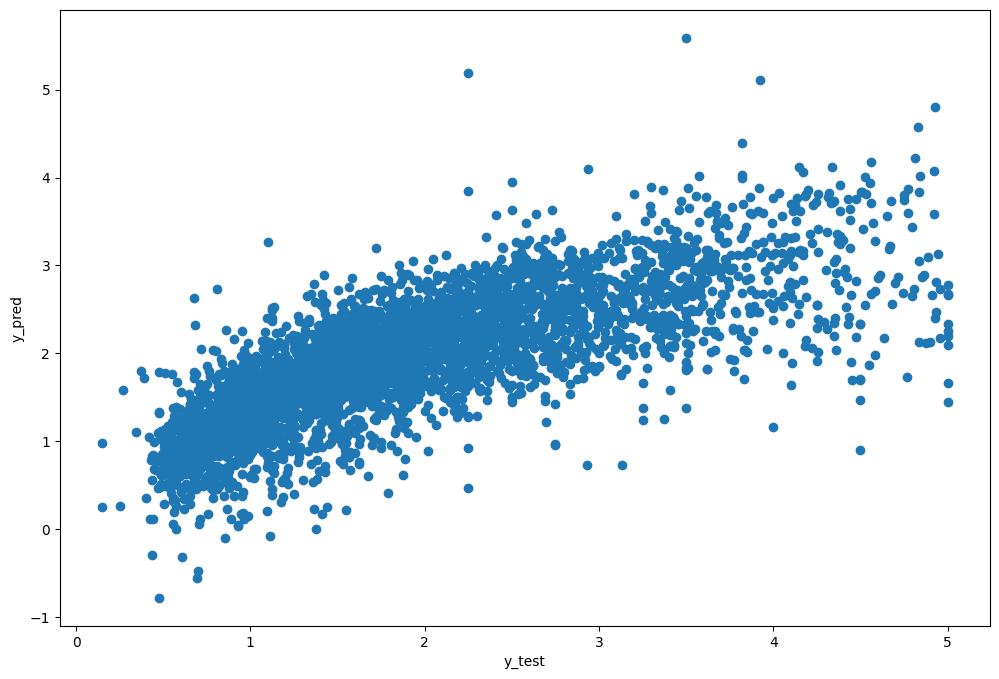

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [24]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [25]:
df_pred_actual_sample.head()

,index,predicted,actual
0,20633,0.848654,0.983
1,12091,1.018347,1.180
2,12014,3.209564,2.442
3,20473,2.676360,2.221
4,17699,2.362502,1.795


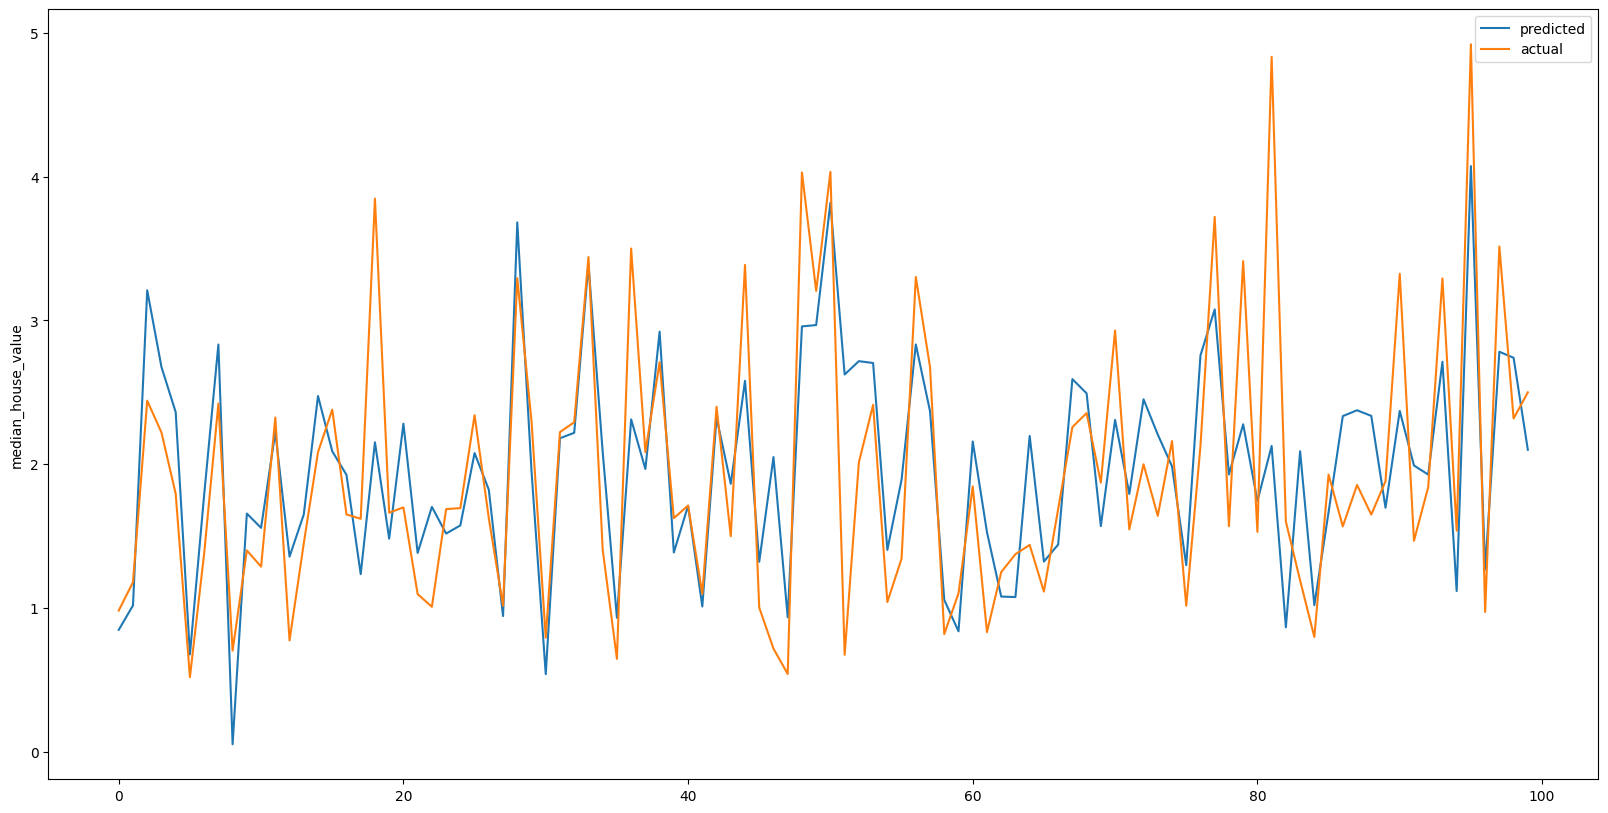

In [26]:
plt.figure(figsize=(20, 10))

plt.plot(df_pred_actual_sample["predicted"], label="predicted")
plt.plot(df_pred_actual_sample["actual"], label="actual")

plt.ylabel("median_house_value")
plt.legend()
plt.show()

## Mean Squared Error 
- **Interpretation:** Measures how far off the predictions are from the correct values on average, in squared units of the target variable. Lower MSE indicates better model performance (closer predictions to actual values).
- **Good vs. Bad Values:** There's no universal threshold, but generally, a lower MSE is better. The importance depends on the scale and range of your target variable. A small MSE on a dataset with values in the range of 0-1 might be less significant than a similar MSE on a dataset with values in the 1000-2000 range.

In [44]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.42389676818457067


## Root Mean Squared Error (RMSE):

- **Interpretation:** Represents the standard deviation of the errors, expressed in the same units as the target variable. It's easier to interpret than MSE because it's in the same scale as the target values.
- **Good vs. Bad Values:** A lower RMSE is better, indicating a smaller average error magnitude. The importance depends on the scale and range of your target variable, similar to MSE and MAE.

In [45]:
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.6510735505183501


## R-Squared
- **Interpretation:** A value closer to 1 indicates a better fit, meaning the model explains a higher proportion of the variance. However, R² can be misleading, especially with highly correlated features. It might increase even if the model doesn't capture the underlying relationships well.
-  **Good vs. Bad Values:** Higher R² is generally preferred, but be cautious of overfitting. Consider it alongside other metrics for a more comprehensive evaluation.

In [40]:
r2 = r2_score(y_test, y_pred)
print(f"R squared: {r2}")

R squared: 0.5748697510633904


## Mean Absolute Error (MAE)

- **Interpretation:** Measures the average magnitude of errors, in the same units as the target variable. It's less sensitive to outliers compared to MSE. Lower MAE suggests better model performance (smaller average prediction errors).
- **Good vs. Bad Values:** A lower MAE is better. Similar to MSE, the significance depends on the scale and range of your target variable.

In [46]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.48980165132294107


## Cross-Validation Scores

- **Interpretation:** Provides an idea of how well the model might perform on unseen data. Scores closer to 1 for regression tasks (higher for classification) indicate better generalization ability.
- **Good vs. Bad Values:** Higher cross-validation scores suggest better model generalizability. However, it's crucial to consider other evaluation metrics alongside this to get a more holistic understanding.

In [50]:
cross_val_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="r2")
print(f"Cross Validation Scores: {cross_val_scores}")

Cross Validation Scores: [0.564793   0.57660474 0.53727492 0.5738093  0.57415218]
